In [73]:
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [35]:
df = pd.concat([pd.read_csv(f) for f in glob.glob('*.csv')], ignore_index = True)

In [36]:
df_sf = df[df['CBSA Code']== 41860].reset_index()

In [37]:
df_sf.head(10)

,index,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,126005,"San Francisco-Oakland-Hayward, CA",41860,2004-01-01,54,Moderate,PM2.5,06-081-1001,15
1,126006,"San Francisco-Oakland-Hayward, CA",41860,2004-01-02,51,Moderate,PM2.5,06-001-0007,14
2,126007,"San Francisco-Oakland-Hayward, CA",41860,2004-01-03,60,Moderate,PM2.5,06-001-0007,14
3,126008,"San Francisco-Oakland-Hayward, CA",41860,2004-01-04,107,Unhealthy for Sensitive Groups,SO2,06-013-0002,15
4,126009,"San Francisco-Oakland-Hayward, CA",41860,2004-01-05,56,Moderate,PM2.5,06-081-1001,14
5,126010,"San Francisco-Oakland-Hayward, CA",41860,2004-01-06,94,Moderate,PM2.5,06-001-0007,14
6,126011,"San Francisco-Oakland-Hayward, CA",41860,2004-01-07,95,Moderate,PM2.5,06-013-0002,15
7,126012,"San Francisco-Oakland-Hayward, CA",41860,2004-01-08,93,Moderate,PM2.5,06-013-0002,14
8,126013,"San Francisco-Oakland-Hayward, CA",41860,2004-01-09,70,Moderate,PM2.5,06-001-0007,14
9,126014,"San Francisco-Oakland-Hayward, CA",41860,2004-01-10,65,Moderate,PM2.5,06-081-1001,15


In [38]:
print(len(df_sf))

5723


In [39]:
df_sf = df[df['CBSA Code']== 41860].reset_index()

In [40]:
df_sf['Date'] = pd.to_datetime(df_sf['Date'], format = '%Y-%m-%d')

In [41]:
df_sf['Year'] = pd.DatetimeIndex(df_sf['Date']).year

In [42]:
df_sf['Month'] = pd.DatetimeIndex(df_sf['Date']).month

In [43]:
df_sf['month_year'] = pd.to_datetime(df_sf['Date']).dt.to_period('M')

In [44]:
df_sf['ordinal'] = pd.to_datetime(df_sf['Date']).apply(lambda date: date.toordinal())

In [45]:
df_sf.head()

,index,CBSA,CBSA Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Year,Month,month_year,ordinal
0,126005,"San Francisco-Oakland-Hayward, CA",41860,2004-01-01,54,Moderate,PM2.5,06-081-1001,15,2004,1,2004-01,731581
1,126006,"San Francisco-Oakland-Hayward, CA",41860,2004-01-02,51,Moderate,PM2.5,06-001-0007,14,2004,1,2004-01,731582
2,126007,"San Francisco-Oakland-Hayward, CA",41860,2004-01-03,60,Moderate,PM2.5,06-001-0007,14,2004,1,2004-01,731583
3,126008,"San Francisco-Oakland-Hayward, CA",41860,2004-01-04,107,Unhealthy for Sensitive Groups,SO2,06-013-0002,15,2004,1,2004-01,731584
4,126009,"San Francisco-Oakland-Hayward, CA",41860,2004-01-05,56,Moderate,PM2.5,06-081-1001,14,2004,1,2004-01,731585


In [46]:
#df_sf_month = df_sf.groupby(['Year','Month','month_year']).AQI.mean().reset_index()

In [47]:
#df_sf_month.head()

In [48]:
sf_before = df_sf[df_sf['Year'] < 2012]

In [49]:
sf_after = df_sf[df_sf['Year']>= 2012]

In [50]:
before_x = np.array(range(len(sf_before)))
after_x = np.array(range(len(sf_after)))

In [51]:
before_x = before_x.reshape(-1,1)
after_x = after_x.reshape(-1,1)

In [74]:
xb_train, xb_test, yb_train, yb_test = train_test_split(before_x, sf_before['AQI'], train_size = 0.8, random_state = 6)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [76]:
train_modb = LinearRegression()
train_modb.fit(xb_train, yb_train)
train_predb = train_modb.predict(xb_test)

In [78]:
print(train_modb.score(xb_test, yb_test))

-0.0026058394168502197


In [75]:
before_model = LinearRegression() 
before_model.fit(before_x, sf_before['AQI']) 
before_pred = before_model.predict(before_x)

In [53]:
after_model = LinearRegression()
after_model.fit(after_x, sf_after['AQI'])
after_pred = after_model.predict(after_x)

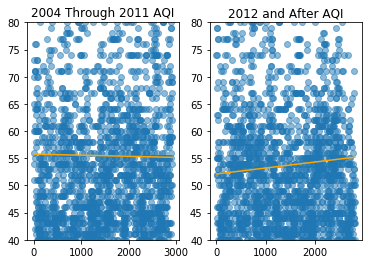

In [63]:
#fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))
plt.subplot(1,2,1)
plt.scatter(before_x, sf_before['AQI'], alpha = 0.5)
plt.plot(before_x, before_pred, color = 'orange')
plt.ylim(40, 80)
plt.title("2004 Through 2011 AQI")
plt.subplot(1,2,2)
plt.scatter(after_x, sf_after['AQI'], alpha = 0.5)
plt.plot(after_x, after_pred, color = 'orange')
plt.ylim(40, 80)
plt.title("2012 and After AQI")
plt.show()



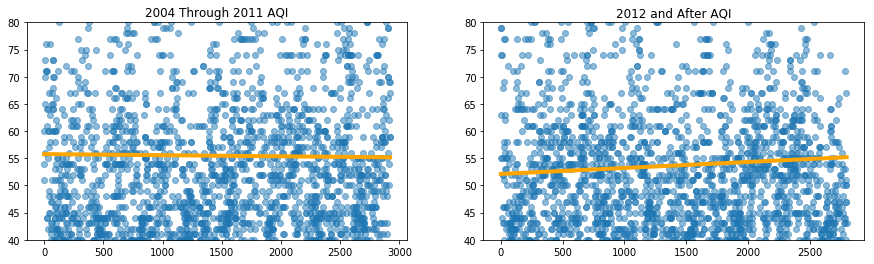

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,4))
ax1.scatter(before_x, sf_before['AQI'], alpha = 0.5)
ax1.plot(before_x, before_pred, color = 'orange', linewidth = 4)
ax1.set_ylim(40, 80)
ax1.set_title("2004 Through 2011 AQI")
ax2.scatter(after_x, sf_after['AQI'], alpha = 0.5)
ax2.plot(after_x, after_pred, color = 'orange', linewidth = 4)
ax2.set_ylim(40, 80)
ax2.set_title("2012 and After AQI")
plt.show()

In [ ]:
plt.scatter(after_x, sf_after['AQI'], alpha = 0.6)
plt.plot(after_x, after_pred, color = 'orange')
plt.ylim(40, 80)
plt.show()

In [ ]:
plt.scatter(range(len(sf_before_avg)),sf_before_avg['AQI'])
plt.show()

In [ ]:
plt.scatter(range(len(sf_after_avg)),sf_after_avg['AQI'])
plt.show()